<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/1.%20Data%20Science%20Fundamentals/Semana%202%20-%20Pandas%20for%20Data%20Manipulation/Semana_2_GROUP_BY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/Pandas/CalIt2.data", header = None)
# Conjunto de datos sin encabezado, para ayudar a su visualizacion se agrega header = None al momento de definir el dataframe

df.head()

,0,1,2,3
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
3,9,07/24/05,00:30:00,0
4,7,07/24/05,01:00:00,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10080 non-null  int64 
 1   1       10080 non-null  object
 2   2       10080 non-null  object
 3   3       10080 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 315.1+ KB


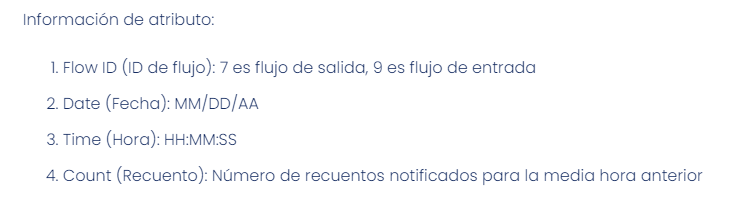

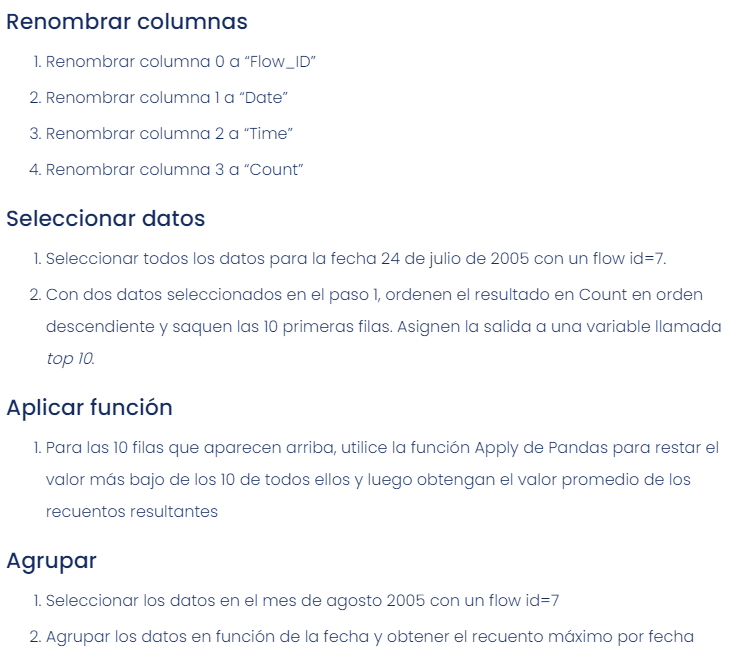

# Renombrar columnas

In [3]:
df.columns = ["Flow_ID",
           "Date",
           "Time",
           "Count"]
df.head(3)

,Flow_ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
1,9,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1


# Seleccion datos

In [4]:
date_filter = df["Date"]== "07/24/05"
flow_filter = df["Flow_ID"] == 7
df_filtrado = df.loc[date_filter & flow_filter,:]
df_filtrado.head()

,Flow_ID,Date,Time,Count
0,7,07/24/05,00:00:00,0
2,7,07/24/05,00:30:00,1
4,7,07/24/05,01:00:00,0
6,7,07/24/05,01:30:00,0
8,7,07/24/05,02:00:00,0


In [5]:
top10 = df_filtrado.sort_values(by=["Count"], ascending=False).head(10)
top10

,Flow_ID,Date,Time,Count
72,7,07/24/05,18:00:00,4
84,7,07/24/05,21:00:00,3
76,7,07/24/05,19:00:00,2
92,7,07/24/05,23:00:00,2
30,7,07/24/05,07:30:00,2
10,7,07/24/05,02:30:00,2
86,7,07/24/05,21:30:00,2
70,7,07/24/05,17:30:00,2
68,7,07/24/05,17:00:00,1
74,7,07/24/05,18:30:00,1


#Aplicar funcion

In [7]:
valor_minimo = top10["Count"].min()
def subtractLowest(x):
  return x - valor_minimo

top10['Count'].apply(subtractLowest).mean()


1.1

# Agrupar

In [8]:
data_agosto = df["Date"].between("08/01/05","08/31/05")
data_flow_7 = df["Flow_ID"] == 7
df_filtrado = df[data_agosto & data_flow_7]
df_filtrado.groupby(["Date"]).max()

,Flow_ID,Time,Count
Date,,,
08/01/05,7,23:30:00,18
08/02/05,7,23:30:00,16
08/03/05,7,23:30:00,26
08/04/05,7,23:30:00,40
08/05/05,7,23:30:00,17
08/06/05,7,23:30:00,8
08/07/05,7,23:30:00,3
08/08/05,7,23:30:00,16
08/09/05,7,23:30:00,19


In [9]:
df_filtrado[df_filtrado["Date"] == "08/30/05"].max() # comprobacion el dia 30 efectivamente el valor max corresponde a 47

Flow_ID           7
Date       08/30/05
Time       23:30:00
Count            47
dtype: object